Copyright 2023 The Google Research Authors.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [1]:
!git clone https://github.com/google-research/google-research.git
!pip install tensorflow

Cloning into 'google-research'...
remote: Enumerating objects: 106243, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 106243 (delta 39), reused 18 (delta 18), pack-reused 106163 (from 4)
Receiving objects: 100% (106243/106243), 1.10 GiB | 24.20 MiB/s, done.
Resolving deltas: 100% (61936/61936), done.
Updating files: 100% (22254/22254), done.


In [2]:
import sys
sys.path.append('./google-research')

In [3]:
from android_in_the_wild import visualization_utils
import tensorflow as tf
import random

In [4]:
dataset_name = 'google_apps'  #@param ["general", "google_apps", "install", "single", "web_shopping"]

dataset_directories = {
    'general': 'gs://gresearch/android-in-the-wild/general/*',
    'google_apps': 'gs://gresearch/android-in-the-wild/google_apps/*',
    'install': 'gs://gresearch/android-in-the-wild/install/*',
    'single': 'gs://gresearch/android-in-the-wild/single/*',
    'web_shopping': 'gs://gresearch/android-in-the-wild/web_shopping/*',
}

In [5]:
filenames = tf.io.gfile.glob(dataset_directories[dataset_name])
raw_dataset = tf.data.TFRecordDataset(filenames, compression_type='GZIP').as_numpy_iterator()

In [6]:
def get_episode(dataset):
  """Grabs the first complete episode."""
  episode = []
  episode_id = None
  for d in dataset:
    ex = tf.train.Example()
    ex.ParseFromString(d)
    ep_id = ex.features.feature['episode_id'].bytes_list.value[0].decode('utf-8')
    if episode_id is None:
      episode_id = ep_id
      episode.append(ex)
    elif ep_id == episode_id:
      episode.append(ex)
    else:
      break
  return episode


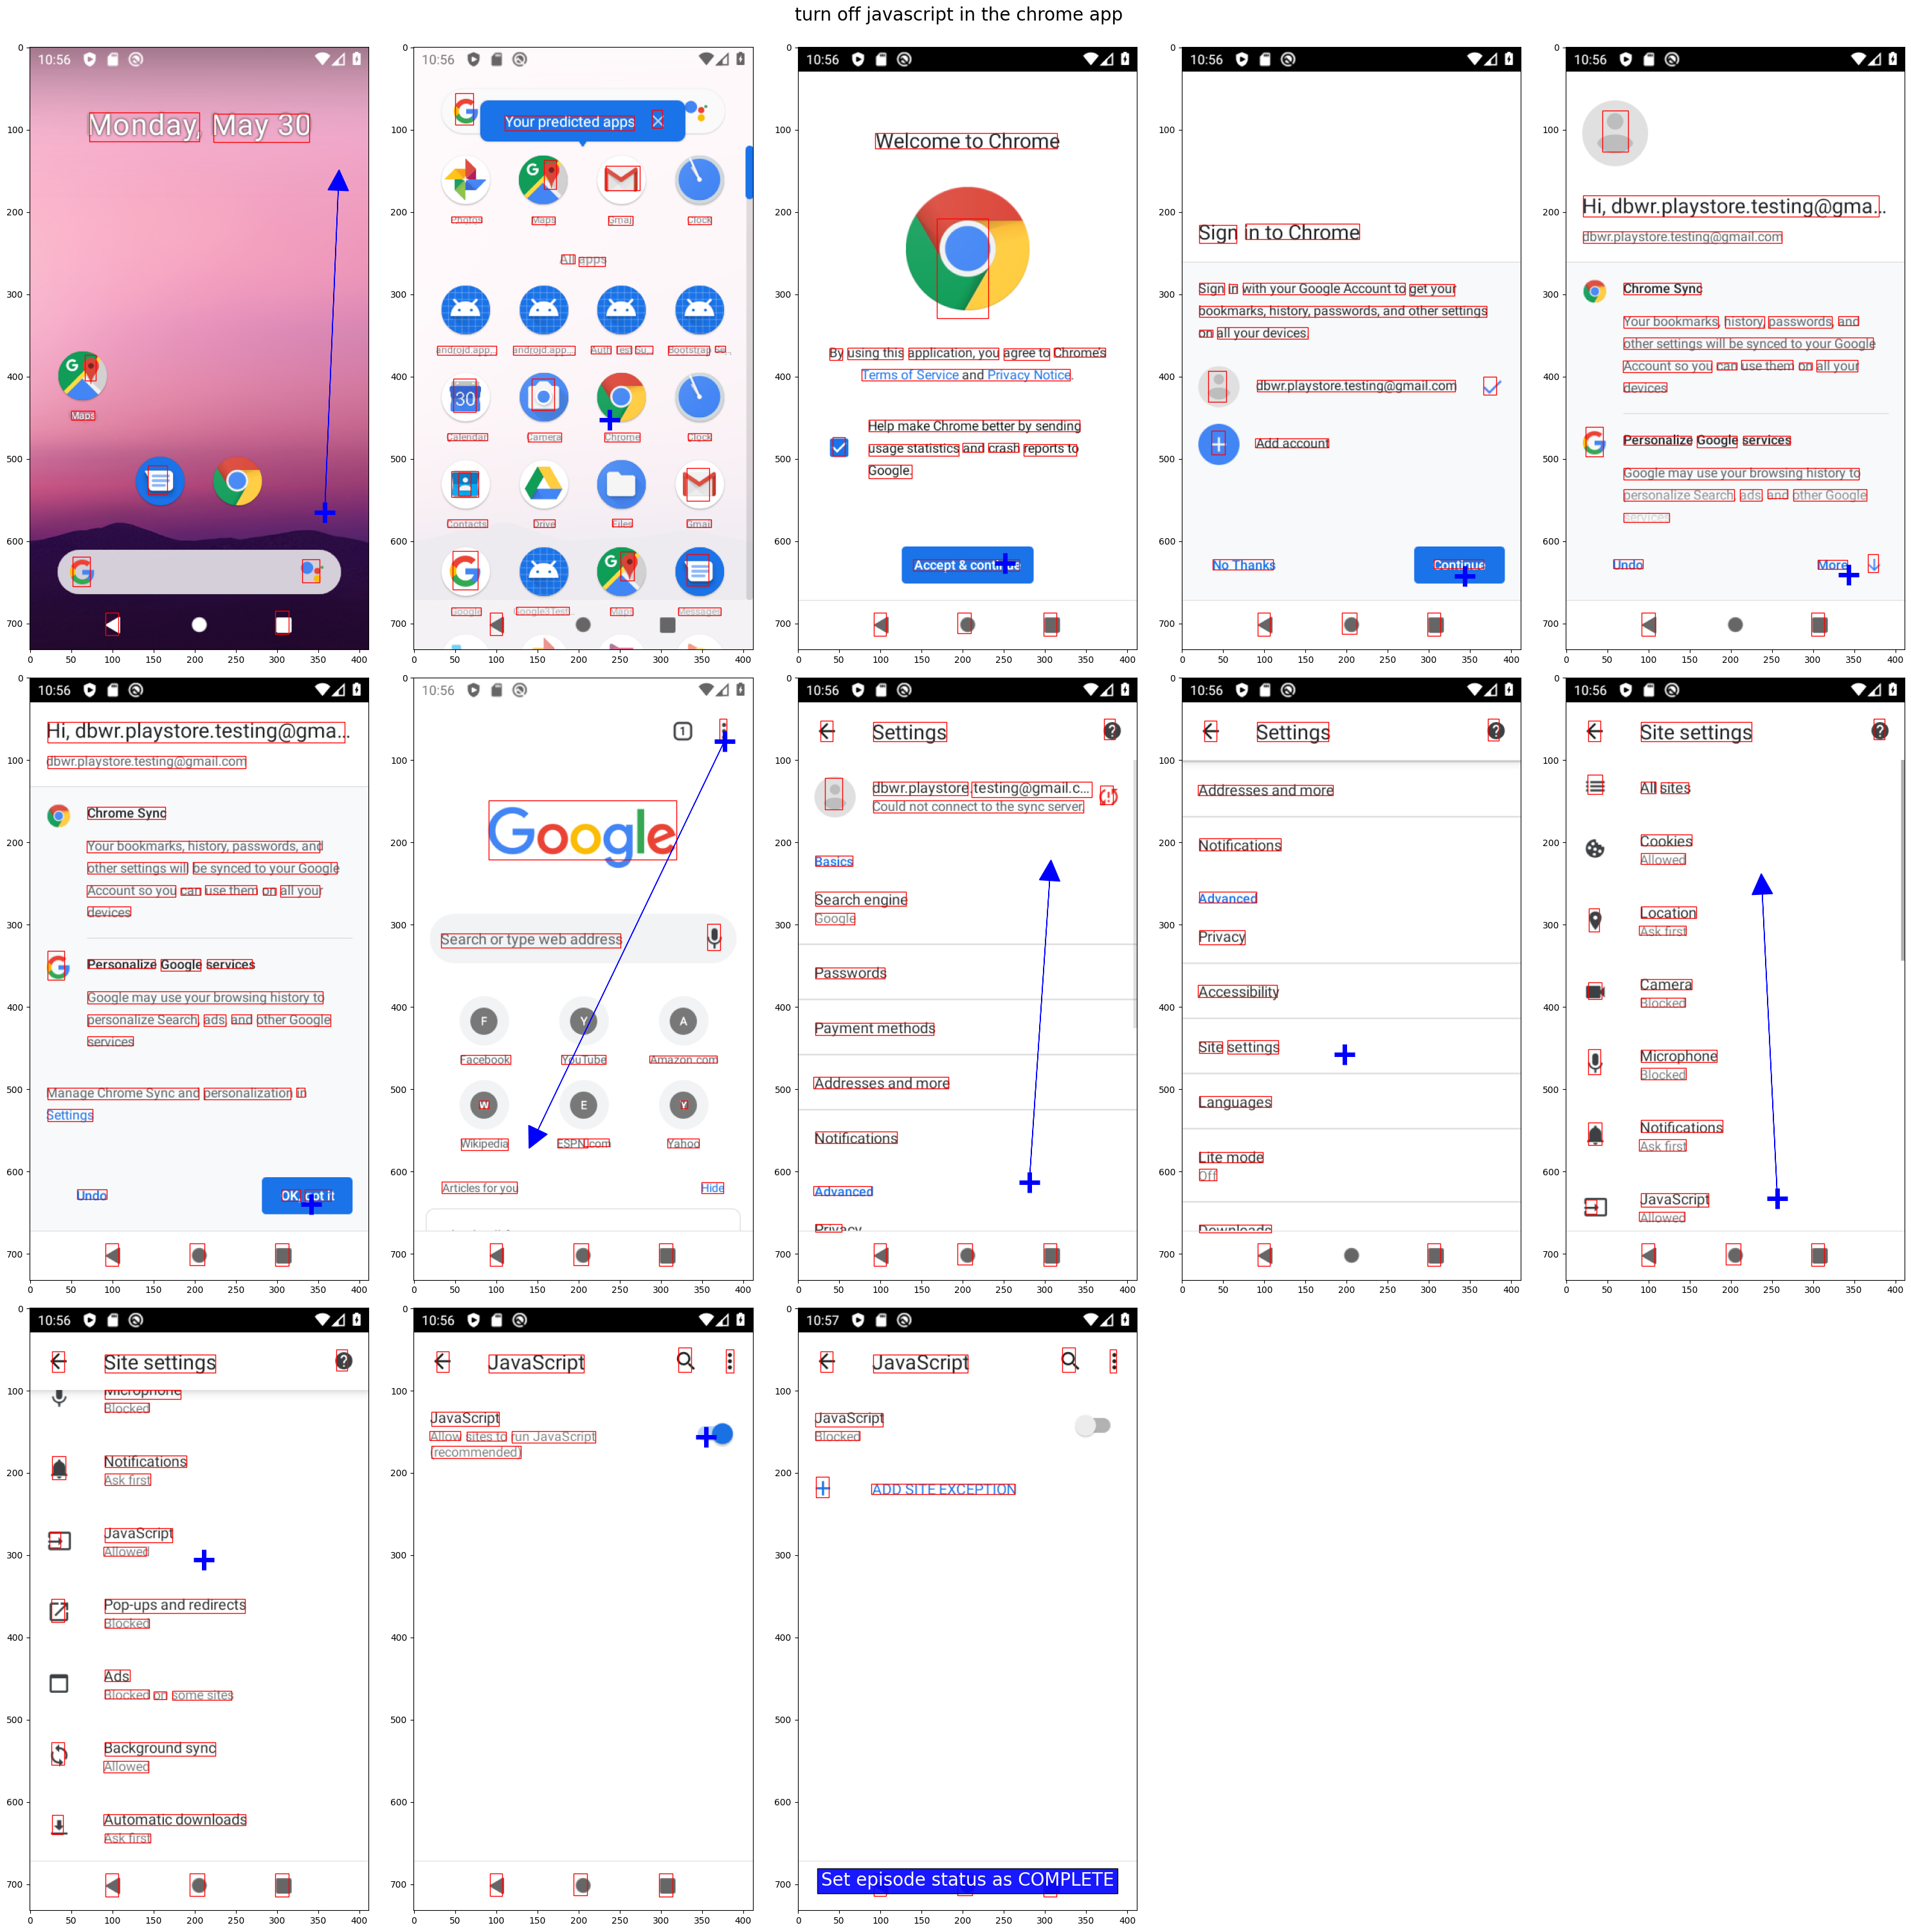

In [7]:
ep = get_episode(raw_dataset)
visualization_utils.plot_episode(ep, show_annotations=False, show_actions=False)